Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


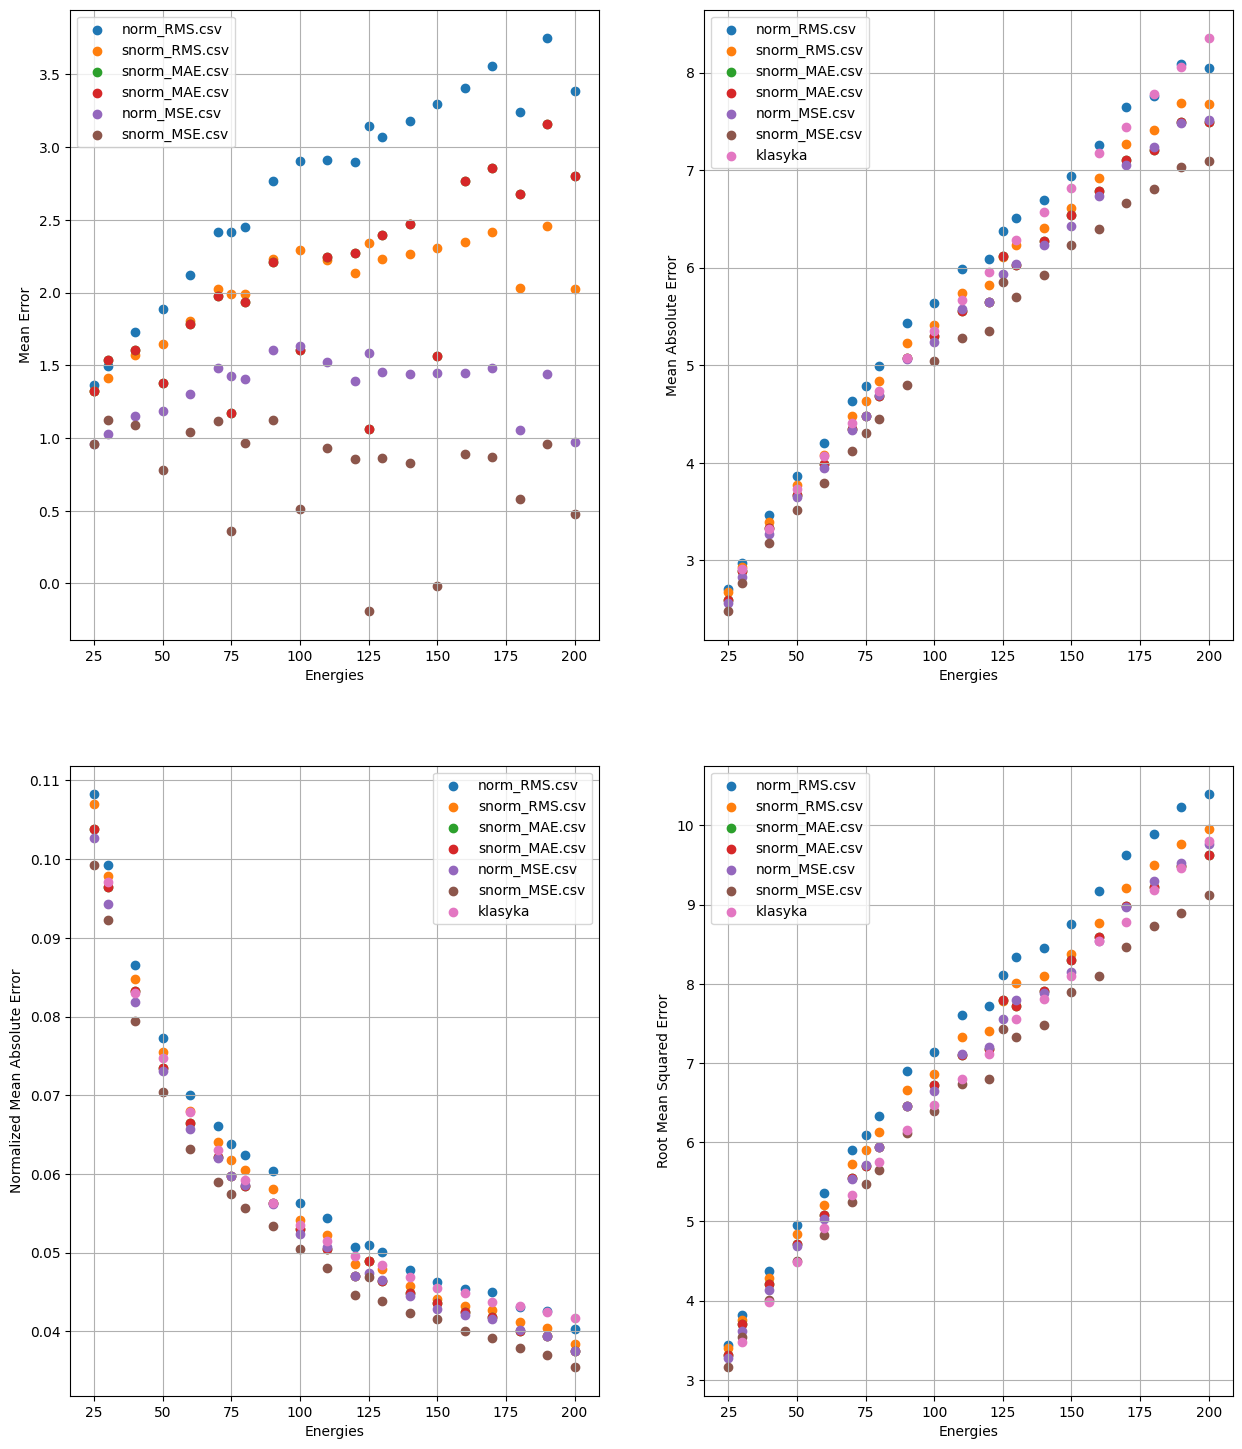

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import csv
import matplotlib.pyplot as plt
import numpy as np

def Load_Classical(File1,File2):
    with open(File1) as csv_file:
        csv_read=csv.reader(csv_file, delimiter=',')
        reg=list(csv_read)
    kTE=[]
    kMAE=[]
    for i in range(1,len(reg)):
        kTE.append(float(reg[i][0][0:5]))
        if reg[i][0][10]=='\t':
            kMAE.append(float(reg[i][0][11:16]))
        else:
            kMAE.append(float(reg[i][0][10:16]))
    kTE=np.array(kTE)
    kMAE=np.array(kMAE)
    with open(File2) as csv_file:
        csv_read=csv.reader(csv_file, delimiter=',')
        reg=list(csv_read)
    kRMS=[]
    kSTD=[]
    for i in range(1,len(reg)):
        if reg[i][0][10]=='\t':
            kRMS.append(float(reg[i][0][11:16]))
        else:
            kRMS.append(float(reg[i][0][10:16]))
        kSTD.append(float(reg[i][0][-8:-1]))
    kRMS=np.array(kRMS)
    kSTD=np.array(kSTD)
    return kTE, kMAE, kRMS, kSTD

kTE, kMAE, kRMS, kSTD = Load_Classical('/content/drive/My Drive/klasyka_z_regresja.txt','/content/drive/My Drive/TE_RMSE_sigma.txt')

Energies=np.sort(np.array([130,140,40,30,200,100,90,170,120,150,190,70,160,60,80,180,110,50,25,75,125]))
nazwy=['norm_RMS.csv','snorm_RMS.csv', 'snorm_MAE.csv','snorm_MAE.csv' ,'norm_MSE.csv', 'snorm_MSE.csv']
labelki=['Big, $\sqrt{\sum \left(\frac{(y_i-y)}{\sqrt{y}}\right)^2}$']
fig, axes = plt.subplots(2, 2, figsize=(15, 18))
for nazwa in nazwy:
  ME=[]
  MAE=[]
  normMAE=[]
  RMS=[]

  with open('/content/drive/My Drive/'+nazwa, mode='r') as file:
              reader = csv.DictReader(file)
              for row in reader:
                  ME.append(float(row['ME']))
                  MAE.append(float(row['MAE']))
                  normMAE.append(float(row['normMAE']))
                  RMS.append(float(row['RMS']))
  axes[0,0].scatter(Energies,ME,label=nazwa)
  axes[0, 0].set_xlabel('Energies')
  axes[0, 0].set_ylabel('Mean Error')
  axes[0,0].legend()
  axes[0,1].scatter(Energies,MAE,label=nazwa)
  axes[0,1].set_xlabel('Energies')
  axes[0,1].set_ylabel('Mean Absolute Error')
  axes[0,1].legend()
  axes[1,0].scatter(Energies,np.array(MAE)/Energies, label=nazwa)
  axes[1,0].set_xlabel('Energies')
  axes[1,0].set_ylabel('Normalized Mean Absolute Error')
  axes[1,0].legend()
  axes[1,1].scatter(Energies,RMS,label=nazwa)
  axes[1,1].set_xlabel('Energies')
  axes[1,1].set_ylabel('Root Mean Squared Error')

axes[0,1].scatter(kTE,kMAE,label='klasyka')
axes[0,1].set_xlabel('Energies')
axes[0,1].set_ylabel('Mean Absolute Error')
axes[0,1].legend()
axes[1,0].scatter(kTE,kMAE/kTE,label='klasyka')
axes[1,0].set_xlabel('Energies')
axes[1,0].set_ylabel('Normalized Mean Absolute Error')
axes[1,0].legend()
axes[1,1].scatter(kTE,kRMS,label='klasyka')
axes[1,1].set_xlabel('Energies')
axes[1,1].set_ylabel('Root Mean Squared Error')
plt.legend()
axes[0, 0].grid(True)
axes[0, 1].grid(True)
axes[1, 0].grid(True)
axes[1, 1].grid(True)
plt.savefig('plot.png')
plt.show()

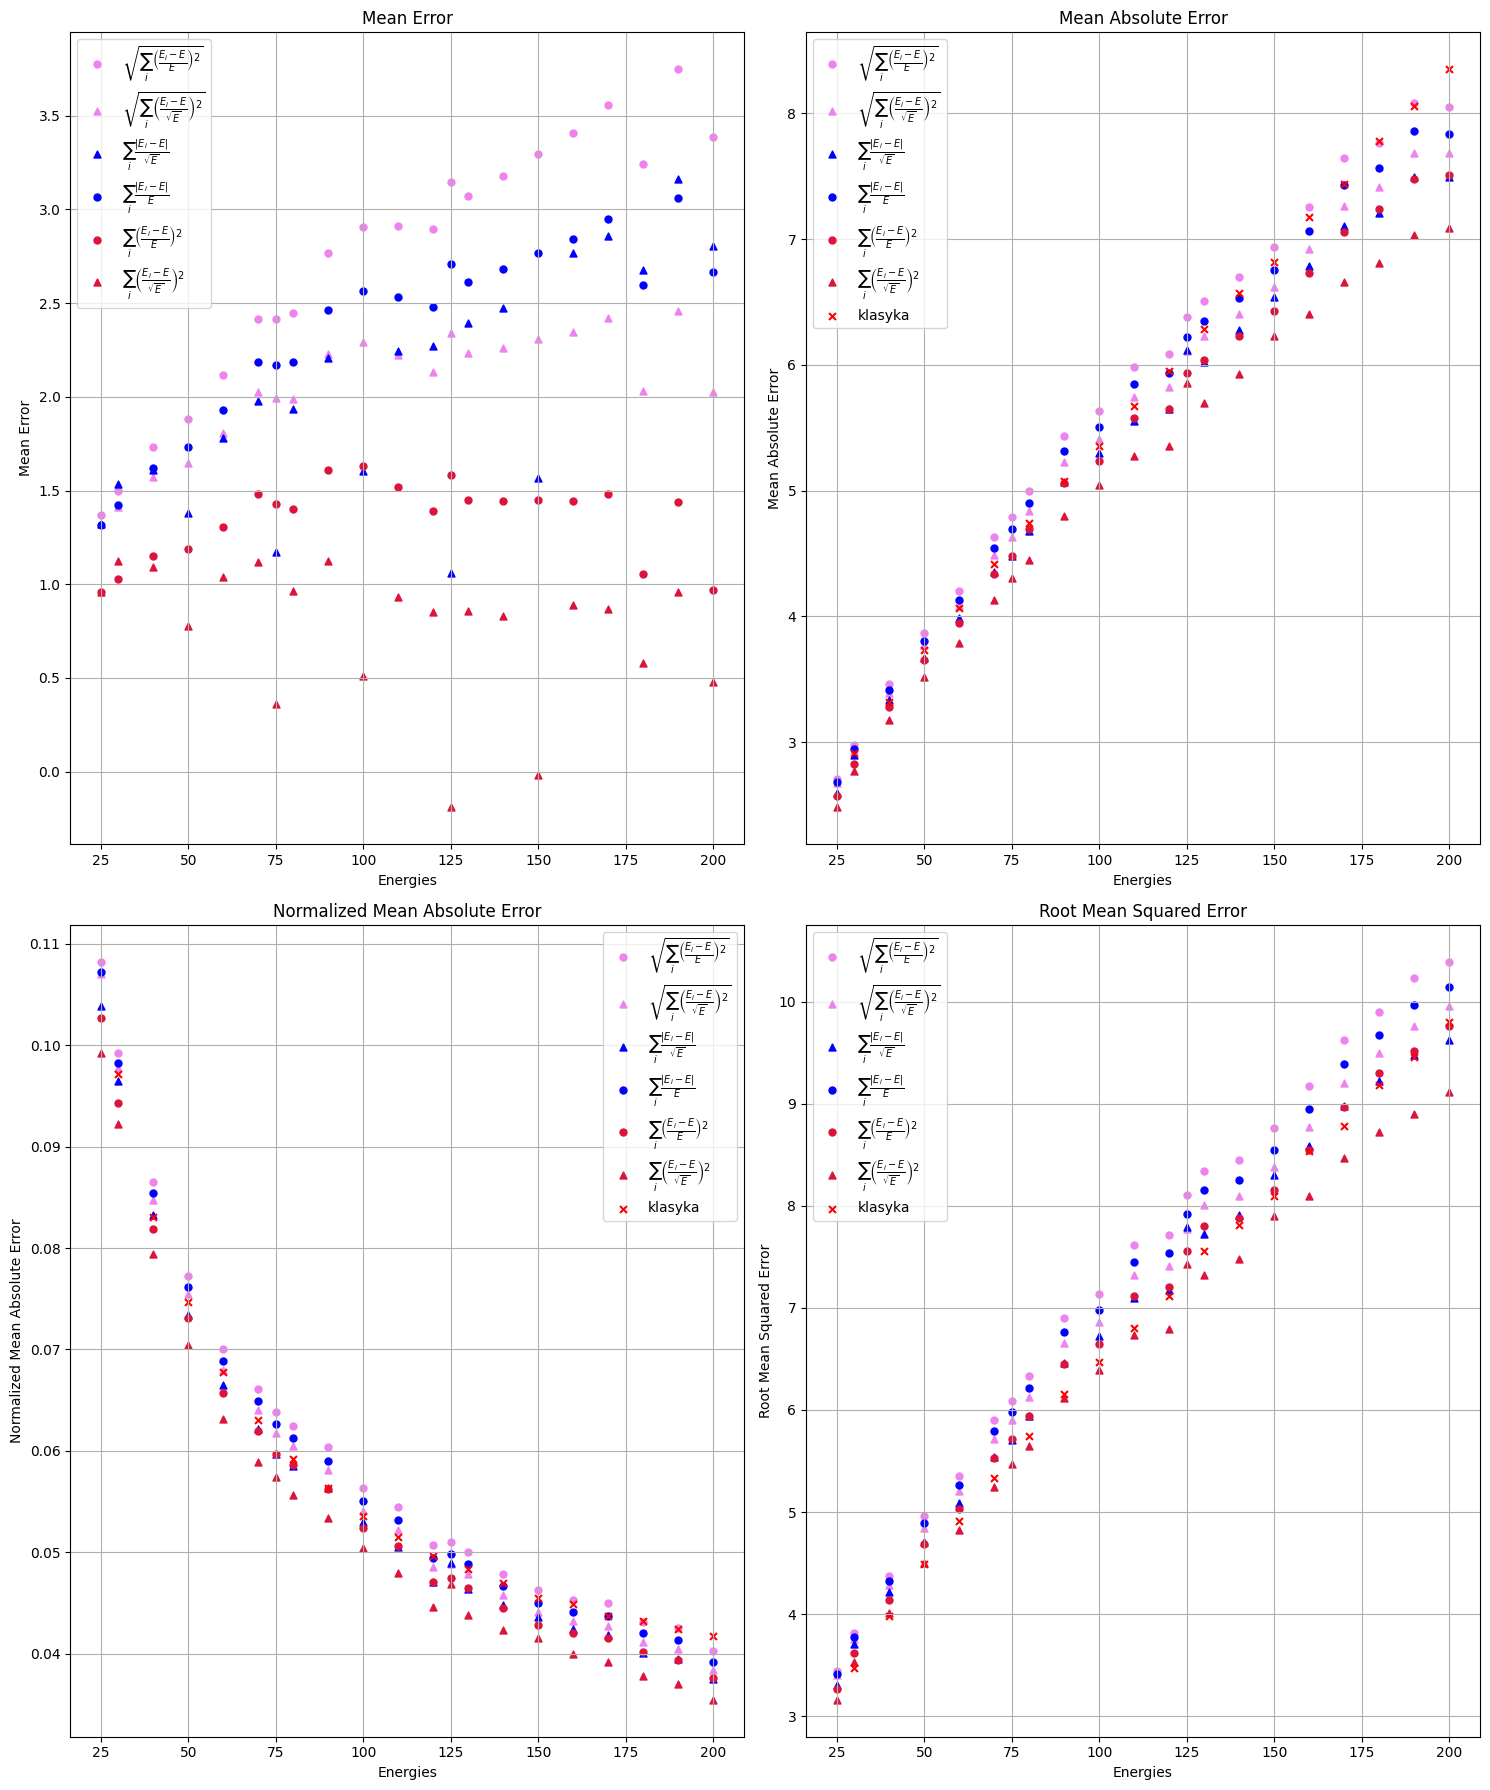

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to mimic the structure of your data
Energies = np.sort(np.array([130, 140, 40, 30, 200, 100, 90, 170, 120, 150, 190, 70, 160, 60, 80, 180, 110, 50, 25, 75, 125]))
kTE, kMAE, kRMS, kSTD = Load_Classical('/content/drive/My Drive/klasyka_z_regresja.txt','/content/drive/My Drive/TE_RMSE_sigma.txt')

nazwy = ['norm_RMS.csv', 'snorm_RMS.csv', 'snorm_MAE.csv', 'norm_MAE.csv', 'norm_MSE.csv', 'snorm_MSE.csv']
s=25
# Define markers and colors
marker = ['o', '^', '^', 'o', 'o', '^']  # Circle, square, triangle, diamond
colors = ['violet', 'violet', 'blue', 'blue', 'crimson', 'crimson']
label=[r'$\sqrt{\sum_i \left(\frac{E_i-E}{E}\right)^2}$',r'$\sqrt{\sum_i \left(\frac{E_i-E}{\sqrt{E}}\right)^2}$', r'$\sum_i \frac{|E_i-E|}{\sqrt{E}} $', r'$\sum_i \frac{|E_i-E|}{E} $', r'$\sum_i \left(\frac{E_i-E}{E}\right)^2$' ,r'$\sum_i \left(\frac{E_i-E}{\sqrt{E}}\right)^2$']
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 18))

# Plot each file's data
for i, nazwa in enumerate(nazwy):
  ME=[]
  MAE=[]
  normMAE=[]
  RMS=[]

  with open('/content/drive/My Drive/'+nazwa, mode='r') as file:
              reader = csv.DictReader(file)
              for row in reader:
                  ME.append(float(row['ME']))
                  MAE.append(float(row['MAE']))
                  normMAE.append(float(row['normMAE']))
                  RMS.append(float(row['RMS']))

  axes[0, 0].scatter(Energies, ME, label=label[i], color=colors[i], marker=marker[i], s=s)
  axes[0, 1].scatter(Energies, MAE, label=label[i], color=colors[i], marker=marker[i], s=s)
  axes[1, 0].scatter(Energies, MAE/Energies, label=label[i], color=colors[i], marker=marker[i], s=s)
  axes[1, 1].scatter(Energies, RMS, label=label[i], color=colors[i], marker=marker[i], s=s)

# Plot 'klasyka' data
axes[0, 1].scatter(kTE, kMAE, label='klasyka', color='red', marker='x', s=s)
axes[1, 0].scatter(kTE, kMAE / kTE, label='klasyka', color='red', marker='x', s=s)
axes[1, 1].scatter(kTE, kRMS, label='klasyka', color='red', marker='x', s=s)

# Adding titles and labels
axes[0, 0].set_title('Mean Error')
axes[0, 0].set_xlabel('Energies')
axes[0, 0].set_ylabel('Mean Error')
axes[0, 0].grid(True)
axes[0, 0].legend()

axes[0, 1].set_title('Mean Absolute Error')
axes[0, 1].set_xlabel('Energies')
axes[0, 1].set_ylabel('Mean Absolute Error')
axes[0, 1].grid(True)
axes[0, 1].legend()

axes[1, 0].set_title('Normalized Mean Absolute Error')
axes[1, 0].set_xlabel('Energies')
axes[1, 0].set_ylabel('Normalized Mean Absolute Error')
axes[1, 0].grid(True)
axes[1, 0].legend()

axes[1, 1].set_title('Root Mean Squared Error')
axes[1, 1].set_xlabel('Energies')
axes[1, 1].set_ylabel('Root Mean Squared Error')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('prettier_plot.png')
plt.show()

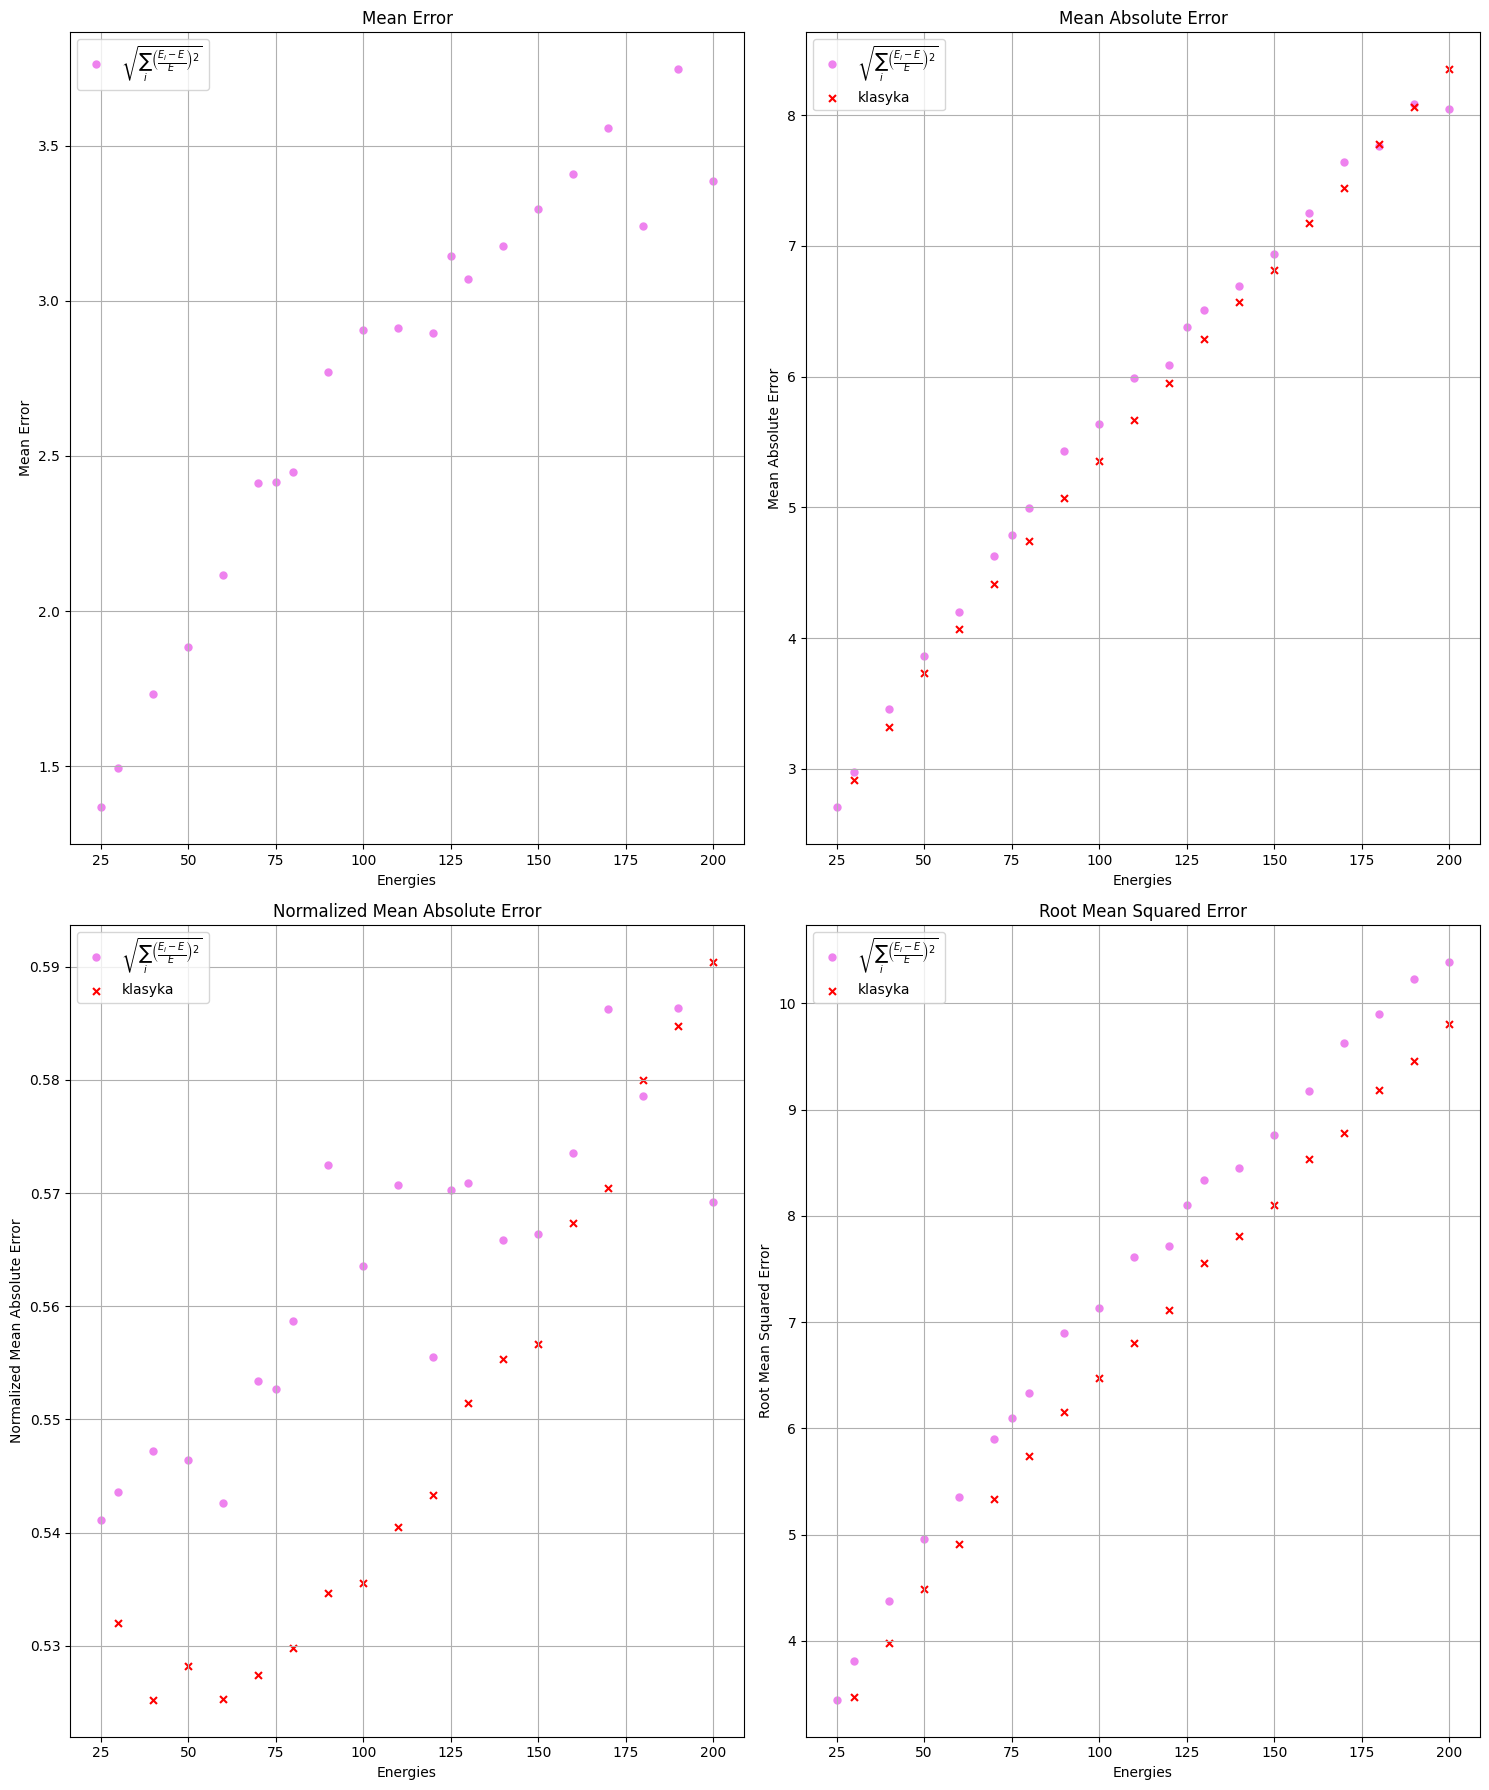

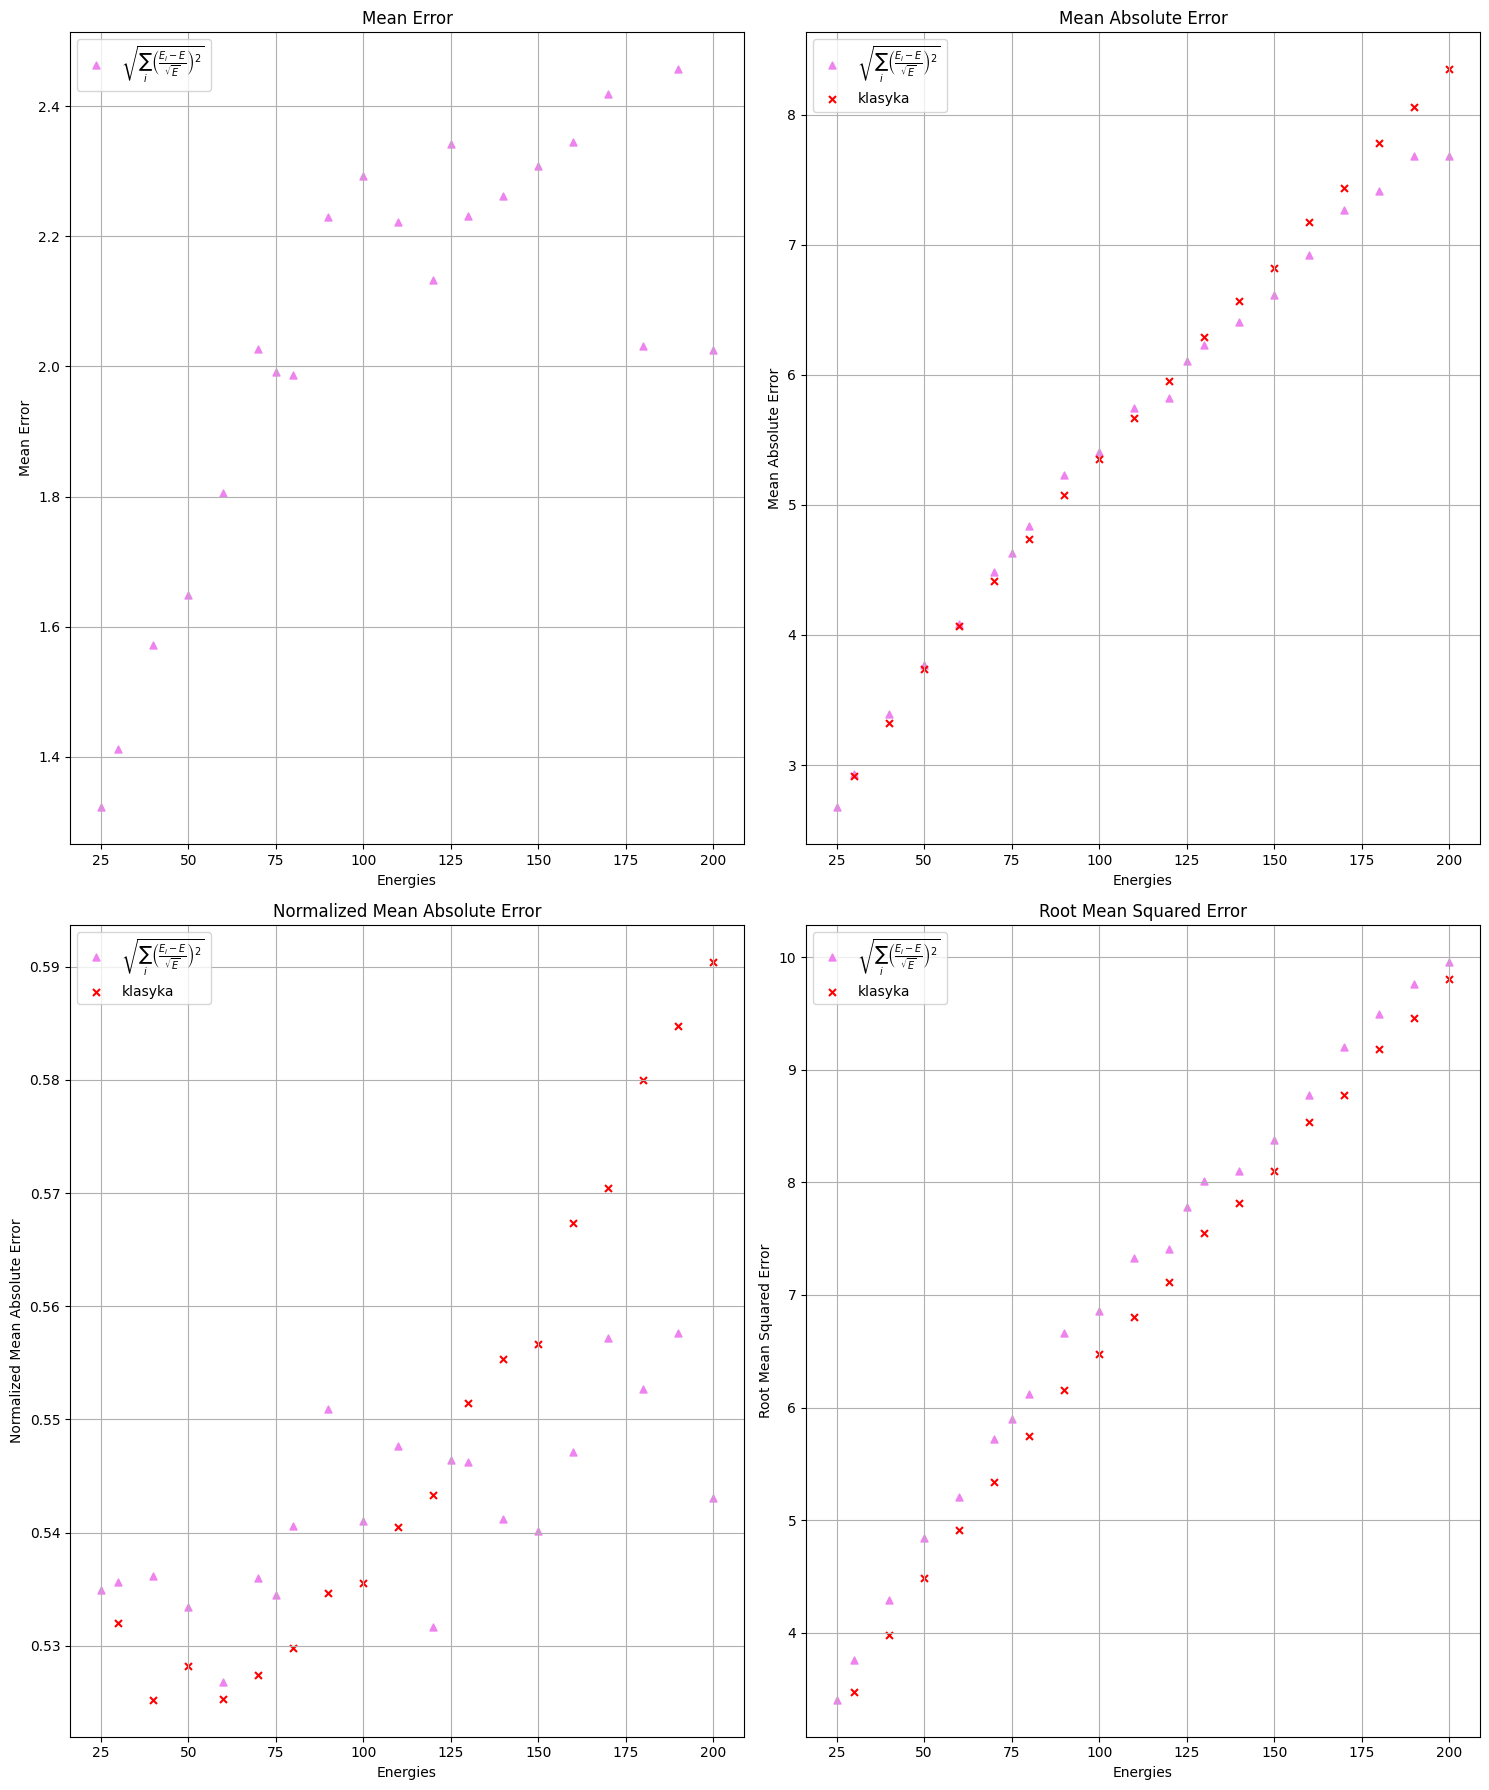

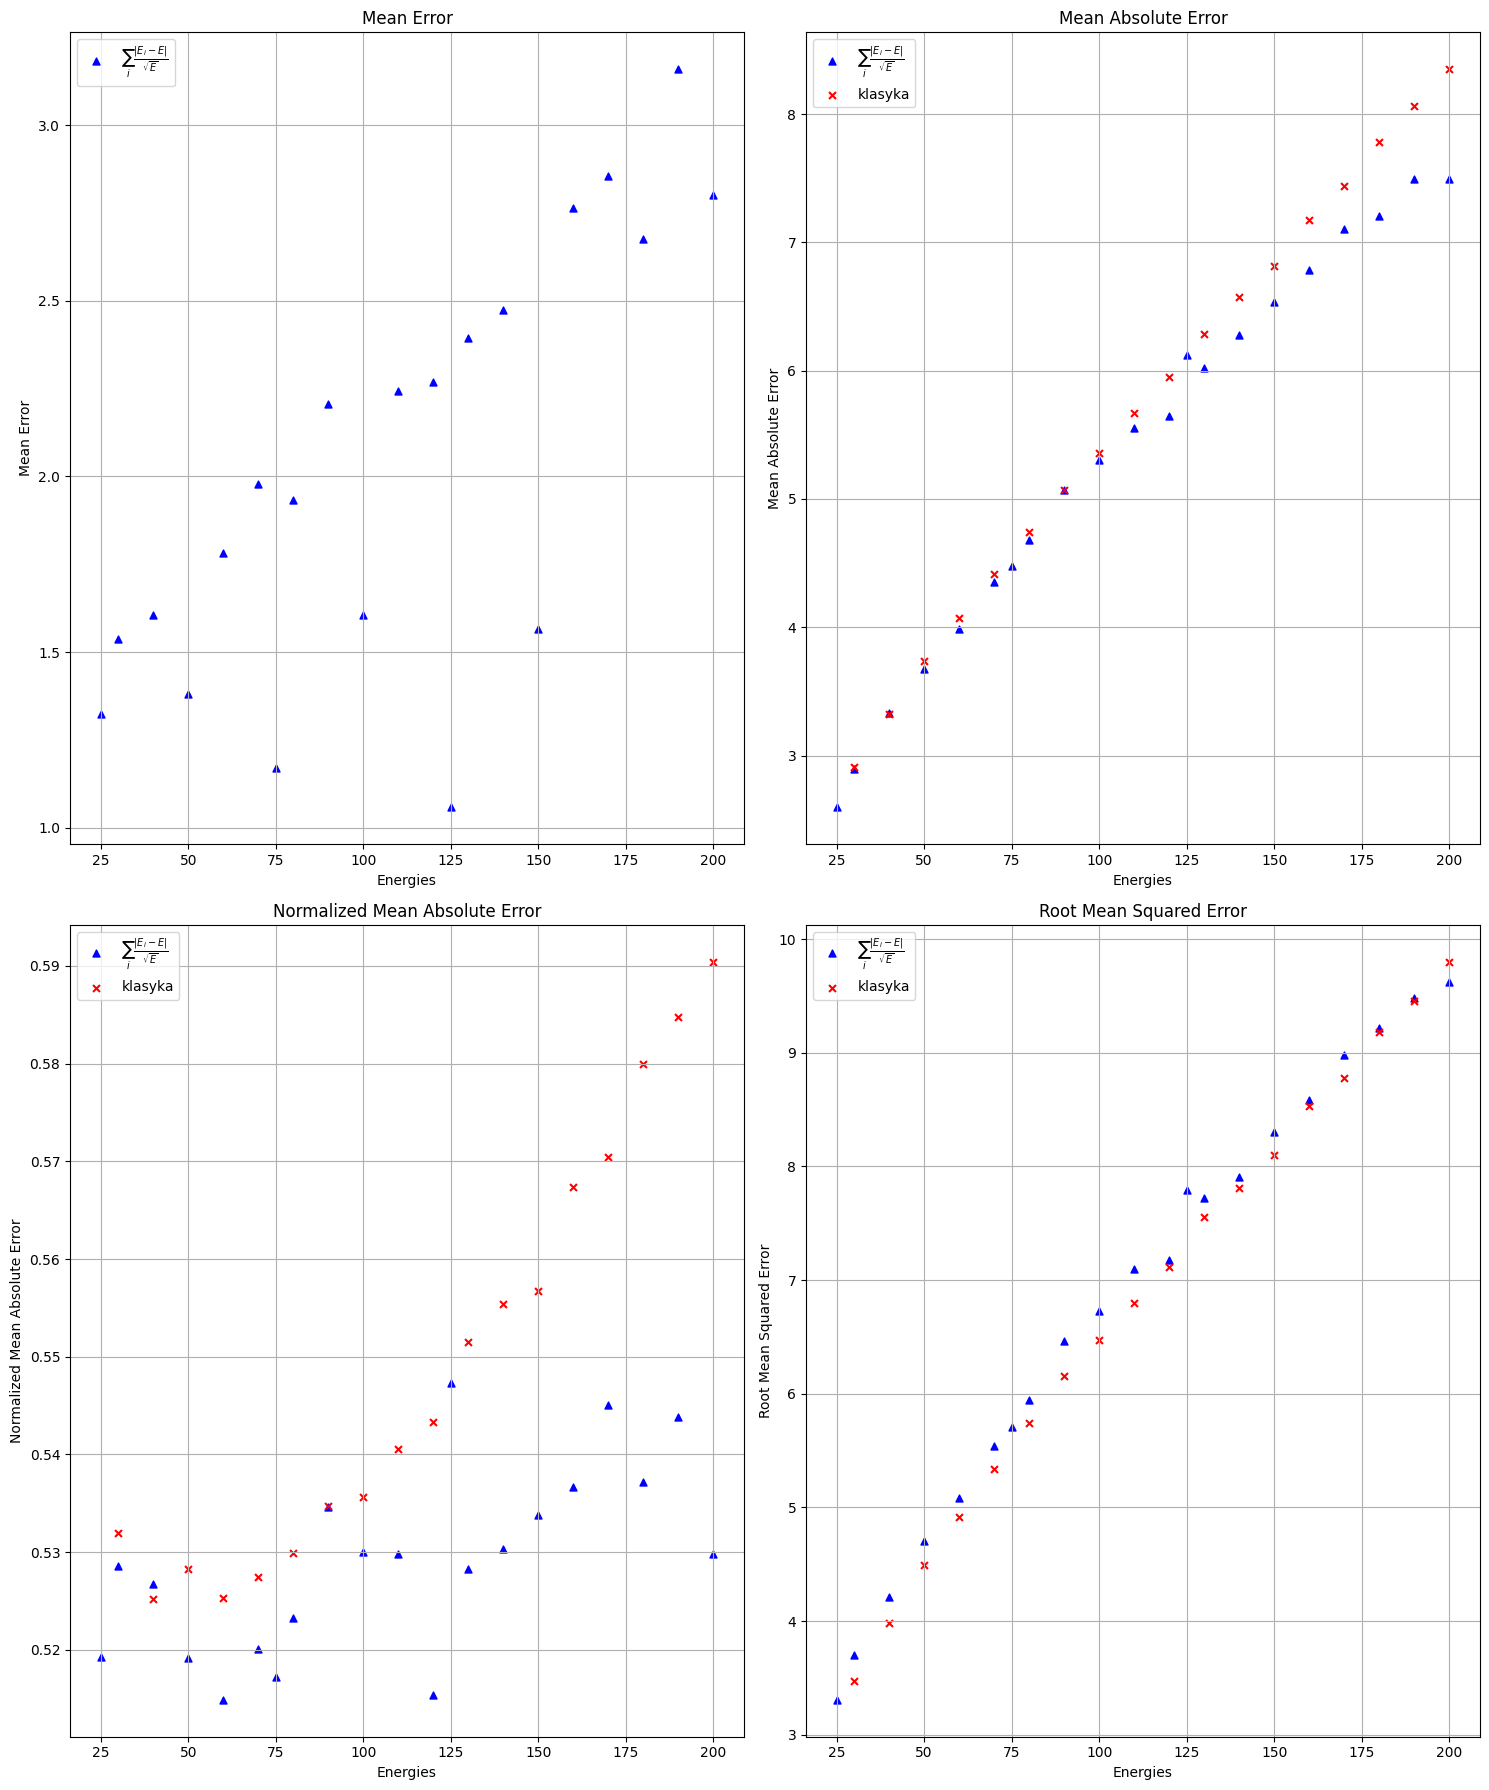

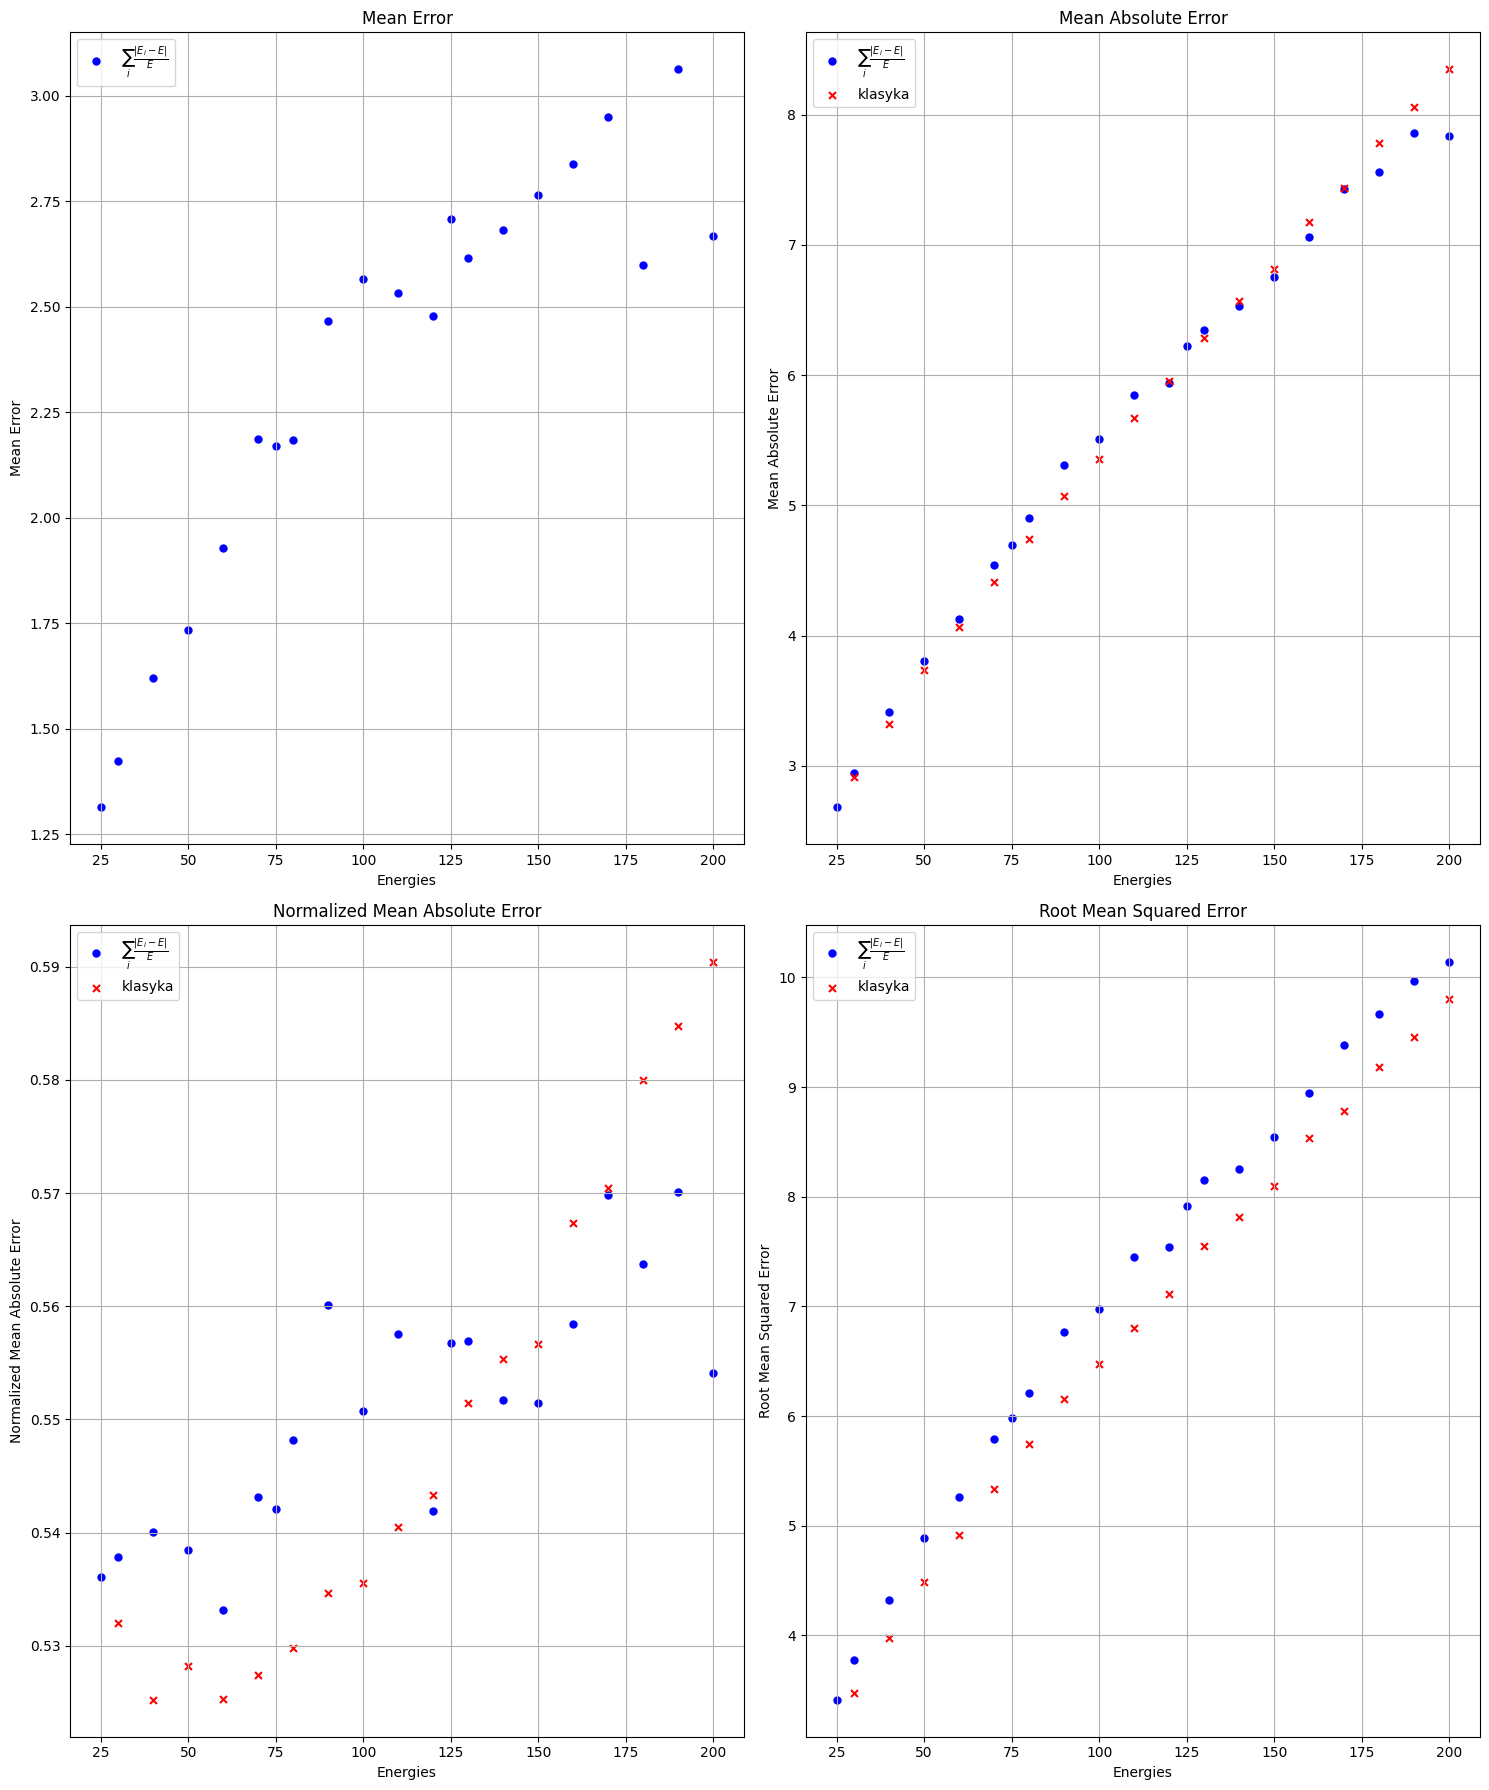

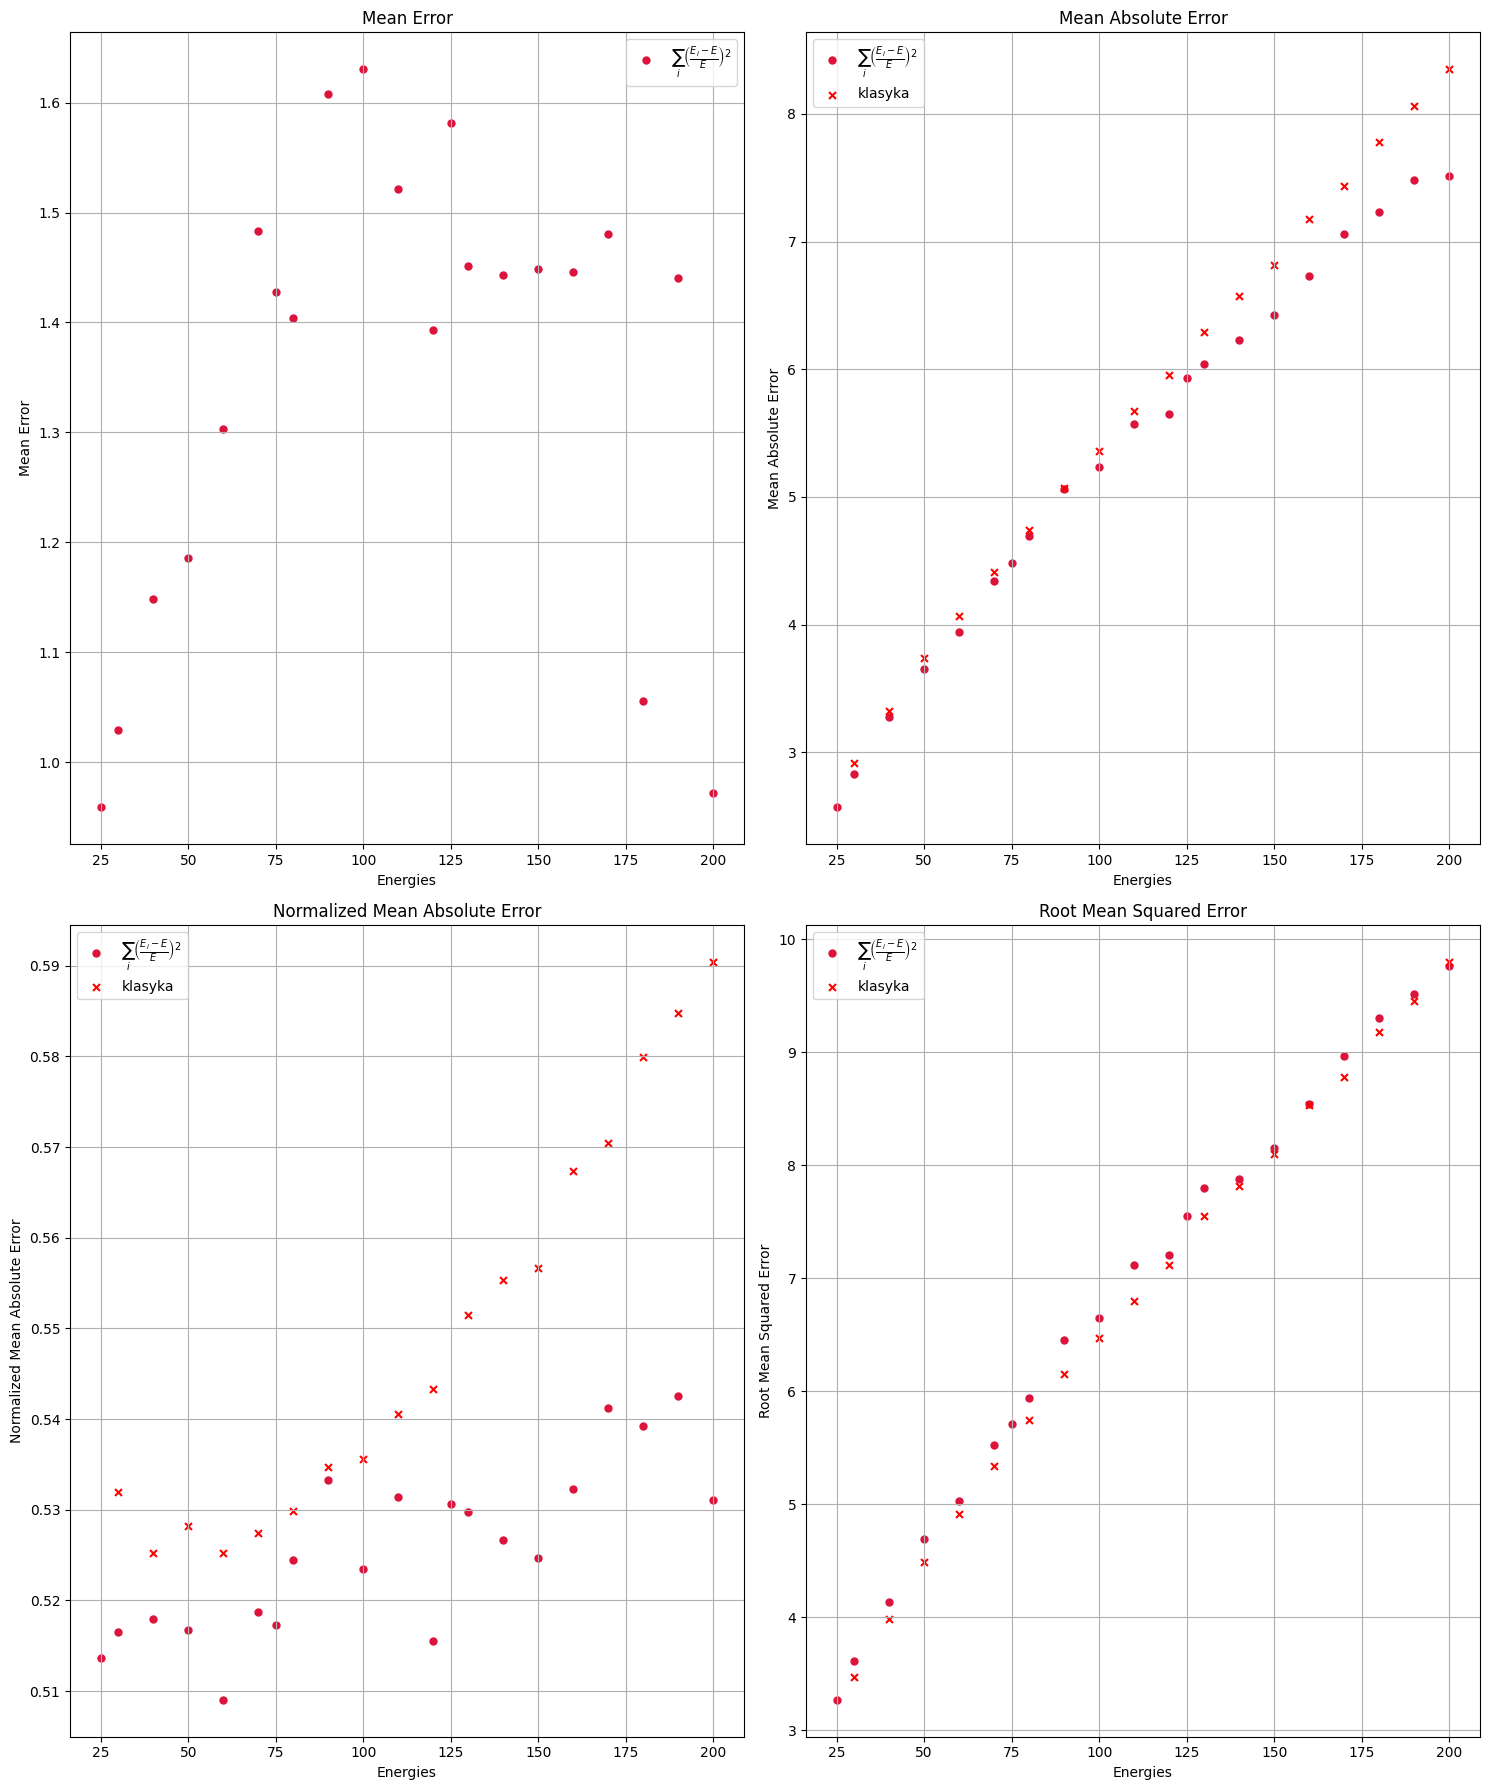

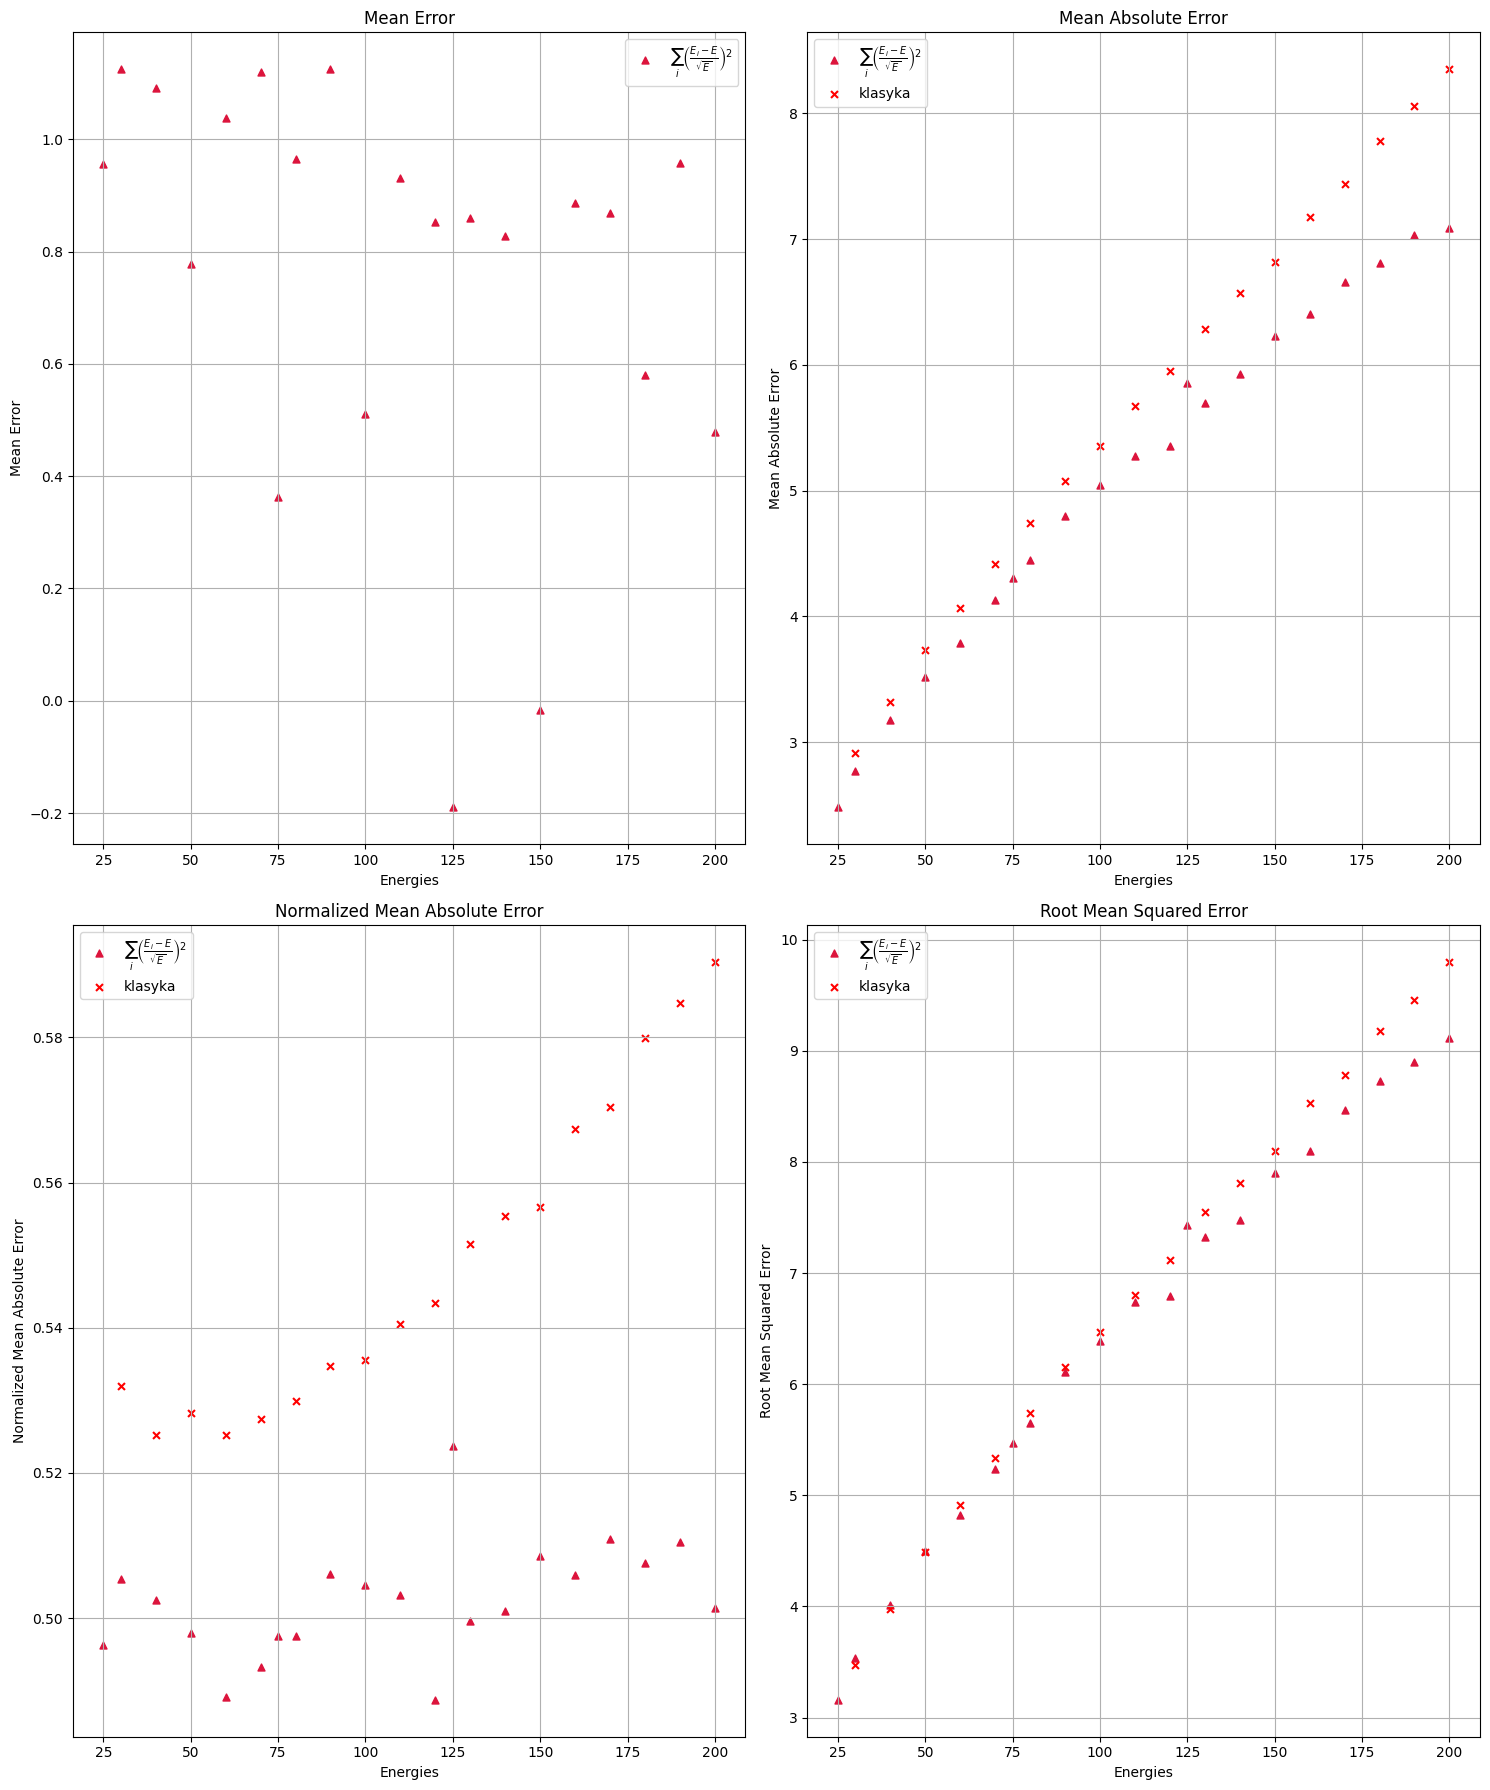

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to mimic the structure of your data
Energies = np.sort(np.array([130, 140, 40, 30, 200, 100, 90, 170, 120, 150, 190, 70, 160, 60, 80, 180, 110, 50, 25, 75, 125]))
kTE, kMAE, kRMS, kSTD = Load_Classical('/content/drive/My Drive/klasyka_z_regresja.txt','/content/drive/My Drive/TE_RMSE_sigma.txt')

nazwy = ['norm_RMS.csv', 'snorm_RMS.csv', 'snorm_MAE.csv', 'norm_MAE.csv', 'norm_MSE.csv', 'snorm_MSE.csv']
s=25
# Define markers and colors
marker = ['o', '^', '^', 'o', 'o', '^']  # Circle, square, triangle, diamond
colors = ['violet', 'violet', 'blue', 'blue', 'crimson', 'crimson']
label=[r'$\sqrt{\sum_i \left(\frac{E_i-E}{E}\right)^2}$',r'$\sqrt{\sum_i \left(\frac{E_i-E}{\sqrt{E}}\right)^2}$', r'$\sum_i \frac{|E_i-E|}{\sqrt{E}} $', r'$\sum_i \frac{|E_i-E|}{E} $', r'$\sum_i \left(\frac{E_i-E}{E}\right)^2$' ,r'$\sum_i \left(\frac{E_i-E}{\sqrt{E}}\right)^2$']
# Plotting

# Plot each file's data
for i, nazwa in enumerate(nazwy):
  fig, axes = plt.subplots(2, 2, figsize=(15, 18))
  ME=[]
  MAE=[]
  normMAE=[]
  RMS=[]

  with open('/content/drive/My Drive/'+nazwa, mode='r') as file:
              reader = csv.DictReader(file)
              for row in reader:
                  ME.append(float(row['ME']))
                  MAE.append(float(row['MAE']))
                  normMAE.append(float(row['normMAE']))
                  RMS.append(float(row['RMS']))

  axes[0, 0].scatter(Energies, ME, label=label[i], color=colors[i], marker=marker[i], s=s)
  axes[0, 1].scatter(Energies, MAE, label=label[i], color=colors[i], marker=marker[i], s=s)
  axes[1, 0].scatter(Energies, normMAE, label=label[i], color=colors[i], marker=marker[i], s=s)
  axes[1, 1].scatter(Energies, RMS, label=label[i], color=colors[i], marker=marker[i], s=s)

  # Plot 'klasyka' data
  axes[0, 1].scatter(kTE, kMAE, label='klasyka', color='red', marker='x', s=s)
  axes[1, 0].scatter(kTE, kMAE / np.sqrt(kTE), label='klasyka', color='red', marker='x', s=s)
  axes[1, 1].scatter(kTE, kRMS, label='klasyka', color='red', marker='x', s=s)

  # Adding titles and labels
  axes[0, 0].set_title('Mean Error')
  axes[0, 0].set_xlabel('Energies')
  axes[0, 0].set_ylabel('Mean Error')
  axes[0, 0].grid(True)
  axes[0, 0].legend()

  axes[0, 1].set_title('Mean Absolute Error')
  axes[0, 1].set_xlabel('Energies')
  axes[0, 1].set_ylabel('Mean Absolute Error')
  axes[0, 1].grid(True)
  axes[0, 1].legend()

  axes[1, 0].set_title('Normalized Mean Absolute Error')
  axes[1, 0].set_xlabel('Energies')
  axes[1, 0].set_ylabel('Normalized Mean Absolute Error')
  axes[1, 0].grid(True)
  axes[1, 0].legend()

  axes[1, 1].set_title('Root Mean Squared Error')
  axes[1, 1].set_xlabel('Energies')
  axes[1, 1].set_ylabel('Root Mean Squared Error')
  axes[1, 1].grid(True)
  axes[1, 1].legend()

  plt.tight_layout()
  plt.savefig('prettier_plot.png')
  plt.show()